# 2015 Elections

# Imports

In [398]:
!pip install --upgrade git+https://github.com/goolig/dsClass.git
from dsClass.path_helper import *
import dsClass

  Cloning https://github.com/goolig/dsClass.git to /tmp/pip-req-build-2sfbyh8g
Requirement not upgraded as not directly required: pydotplus in /opt/conda/lib/python3.6/site-packages (from dsClass==1.0.27) (2.0.2)
Requirement not upgraded as not directly required: pyparsing>=2.0.1 in /opt/conda/lib/python3.6/site-packages (from pydotplus->dsClass==1.0.27) (2.2.0)
  Running setup.py bdist_wheel for dsClass ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-y7k0wq6l/wheels/c7/a9/03/023d8da4b4e004497715eeb1ea9b5d914ad425036bb4bc10b8
Successfully built dsClass
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
tensorflow 1.10.0 has requirement keras-applications>=1.0.5, but you'll have keras-applications 1.0.4 which is incompatible.
tensorflow 1.10.0 has requirement keras-preprocessing>=1.0.3, but you'll have keras-preprocessing 1.0.2 which is incompatible.
mxnet 1.3.0.post0 has requirement numpy<1.15.0,>=1.8.2, but you'll have numpy 1.15.1 which is incompatible.
kmo

In [399]:
import pandas as pd
import itertools
from datetime import timedelta
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

import seaborn as sns
sns.set_context("poster")
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold' 

from IPython.display import display, HTML

import numpy as np
import math

import datetime
import time
import sys

import networkx as nx


import sklearn
print("sklearn.__version__:",sklearn.__version__)

import pylab as pl
import matplotlib.dates as mdates

#print('Machine: {} {}\n'.format(os.uname().sysname,os.uname().machine))
print(sys.version)
from dsClass.path_helper import *

sklearn.__version__: 0.21.dev0
3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) 
[GCC 7.2.0]


# Data Import

In [400]:
file_name = get_file_path("results_by_booth_2015 - english - v3_utf8.csv")
result_df = pd.read_csv(file_name,delimiter=',')
print("Columns:")
print(result_df.columns)
print()
print("df shape:",result_df.shape)
result_df

Columns:
Index(['Settlement_name_hebrew', 'Settlement_code', 'settlement_name_english',
       'Booth_number', 'Registered_voters', 'votes', 'bad_votes',
       'proper_votes', 'Ale Yarok', 'Arab List', 'Democratura', 'Green Party',
       'Haim Bekavod', 'Hope for change', 'Joint List', 'Kalkala', 'Kulanu',
       'Likud', 'Meretz', 'Moreshet Avot', 'Na Nach',
       'National Team (temporary)', 'Or', 'Perach', 'Pirate Party', 'Shas',
       'The Jewish Home', 'Ubizchutan', 'United Torah Judaism', 'Yachad',
       'Yesh Atid', 'Yisrael Beiteinu', 'Zionist Union'],
      dtype='object')

df shape: (10414, 33)


,Settlement_name_hebrew,Settlement_code,settlement_name_english,Booth_number,Registered_voters,votes,bad_votes,proper_votes,Ale Yarok,Arab List,Democratura,Green Party,Haim Bekavod,Hope for change,Joint List,Kalkala,Kulanu,Likud,Meretz,Moreshet Avot,Na Nach,National Team (temporary),Or,Perach,Pirate Party,Shas,The Jewish Home,Ubizchutan,United Torah Judaism,Yachad,Yesh Atid,Yisrael Beiteinu,Zionist Union
0,אבו ג'ווייעד (שבט,967,ABU JUWEI'ID,1.0,425,66,5,61,0,4,0,0,0,0,49,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
1,אבו ג'ווייעד (שבט,967,ABU JUWEI'ID,2.0,638,145,1,144,0,2,0,0,0,0,120,0,0,1,1,0,1,0,0,0,0,2,0,0,0,1,0,0,16
2,אבו ג'ווייעד (שבט,967,ABU JUWEI'ID,3.0,547,102,1,101,0,2,0,0,0,0,73,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,19
3,אבו גוש,472,ABU GHOSH,1.0,705,442,4,438,0,3,1,0,0,0,359,0,8,7,5,0,2,0,0,0,0,4,2,0,2,0,3,1,41
4,אבו גוש,472,ABU GHOSH,2.0,724,458,3,455,1,8,1,0,0,1,397,0,6,2,7,0,0,0,0,0,0,2,2,0,0,1,2,2,23
5,אבו גוש,472,ABU GHOSH,3.0,740,476,11,465,0,11,0,1,0,0,384,0,2,27,7,0,2,0,0,1,0,5,3,0,1,0,4,0,17
6,אבו גוש,472,ABU GHOSH,4.0,717,425,6,419,0,6,0,0,0,0,363,0,1,5,6,0,0,0,0,0,0,8,0,0,0,2,2,0,26
7,אבו גוש,472,ABU GHOSH,5.0,716,381,6,375,1,10,1,0,1,0,302,0,3,10,9,0,0,0,0,0,0,9,3,0,0,1,2,2,21
8,אבו גוש,472,ABU GHOSH,6.0,576,357,3,354,0,3,0,1,0,1,309,0,1,7,7,0,0,0,0,0,0,7,0,0,1,1,1,0,15
9,אבו סנאן,473,ABU SINAN,1.0,676,493,5,488,1,6,0,1,0,0,412,0,9,1,4,0,0,0,0,0,0,11,0,0,0,0,1,17,25


# Clean Data

In [401]:
result_df = result_df.dropna(axis=0, how='any')
result_df = result_df[result_df.votes > 0]
result_df.loc[result_df.Registered_voters == 0,'Registered_voters'] = result_df[result_df.Registered_voters == 0].votes
result_df.shape

(10412, 33)

# Overall Votes Per Party

In [402]:
block_percent = 0.0325

all registerd voters: 6114936
all_votes: 4210884
vote percentage: 0.6886227427400712


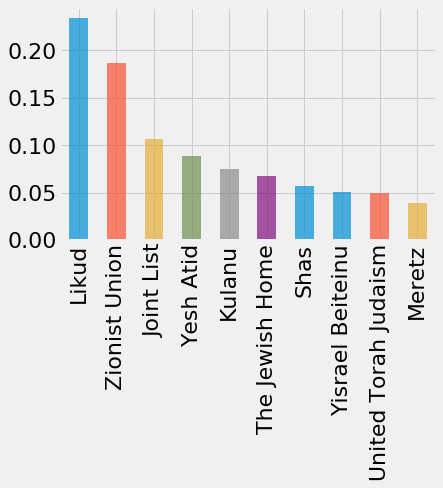

In [403]:
all_registered_voters = result_df.Registered_voters.sum()
all_votes = result_df.proper_votes.sum()
print("all registerd voters:",all_registered_voters)
print("all_votes:",all_votes)
print("vote percentage:",all_votes/all_registered_voters)
overall_votes_per_party = result_df.iloc[:,8:].sum()
percantage_vote_per_pary = overall_votes_per_party/all_votes
percantage_vote_per_pary = percantage_vote_per_pary[percantage_vote_per_pary.values>block_percent]
percantage_vote_per_pary.sort_values(ascending=False).plot.bar(alpha=0.7)

# Group by City and Filter Out Small Parties

In [404]:
# Print the large parties
large_parties = percantage_vote_per_pary.index.values
print(large_parties)

['Joint List' 'Kulanu' 'Likud' 'Meretz' 'Shas' 'The Jewish Home'
 'United Torah Judaism' 'Yesh Atid' 'Yisrael Beiteinu' 'Zionist Union']


In [405]:
non_party_col = list(result_df.iloc[:,0:8].columns)
int_columns = []
int_columns.extend(non_party_col)
int_columns.extend(list(large_parties))
print(int_columns)

['Settlement_name_hebrew', 'Settlement_code', 'settlement_name_english', 'Booth_number', 'Registered_voters', 'votes', 'bad_votes', 'proper_votes', 'Joint List', 'Kulanu', 'Likud', 'Meretz', 'Shas', 'The Jewish Home', 'United Torah Judaism', 'Yesh Atid', 'Yisrael Beiteinu', 'Zionist Union']


In [406]:
res_work_df = result_df.copy()
res_work_df = res_work_df[int_columns]
res_work_df_city = res_work_df.groupby(['settlement_name_english','Settlement_code'])[int_columns[4:]].sum().reset_index()
print(res_work_df_city.shape)
res_work_df_city.head(5)

(1196, 16)


,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
0,A'SAM,963,4129,1331,25,1306,1055,9,10,9,85,1,4,1,3,80
1,ABBIRIM,1220,160,123,1,122,3,6,9,34,4,0,0,12,1,48
2,ABU ABDUN,958,119,37,1,36,35,0,0,0,0,0,0,0,0,0
3,ABU GHOSH,472,4178,2539,33,2506,2114,21,58,41,35,10,4,14,5,143
4,ABU JUWEI'ID,967,1610,313,7,306,242,1,3,8,2,0,0,1,0,39


# Remove low votings rates

In [407]:
min_vote_rate = 0.6
min_proper_votes = 300

In [408]:
res_work_df = res_work_df_city.copy()
res_work_df['vote_rate'] = res_work_df.proper_votes / res_work_df.Registered_voters
res_work_df = res_work_df[(res_work_df.vote_rate > min_vote_rate) & (res_work_df.proper_votes > min_proper_votes)]
print(res_work_df.shape)
res_work_df.sample(10)

(724, 17)


,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate
876,QAZRIN,4100,5769,3556,48,3508,6,384,900,48,83,400,12,321,651,463,0.608078
909,RAMAT HAKOVESH,184,621,484,1,483,2,16,16,82,1,10,0,52,2,295,0.777778
606,MA'ALE SHOMERON,3637,567,461,0,461,0,20,170,2,13,170,4,17,11,13,0.813051
270,EN SHEMER,139,588,438,0,438,2,13,14,139,0,10,0,30,4,212,0.744898
1029,SHETULIM,763,1244,950,8,942,0,122,398,10,29,89,3,73,12,148,0.757235
845,PALMAHIM,597,600,423,3,420,0,21,15,76,2,26,1,47,2,222,0.700000
210,DALIYYA,300,670,522,0,522,2,8,5,195,0,6,1,40,1,259,0.779104
80,ATSMON SEGEV,917,825,617,1,616,0,24,29,117,3,17,0,72,2,349,0.746667
1052,TAL SHAHAR,462,684,568,0,568,1,39,77,57,1,16,0,78,5,282,0.830409
861,PETAHYA,839,633,495,1,494,0,86,177,12,31,30,1,63,7,75,0.780411


In [474]:
res_work_df[res_work_df.settlement_name_english.str.contains("BE'ER SHEVA|TEL AVIV|JERU|HAI")] # BE'ER SHEVA / TEL AVIV / JERUSALEM 


,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate
119,BE'ER SHEVA,9000,156696,98505,1352,97153,531,8548,36614,1357,6178,6782,676,7364,11721,11887,0.620009
387,HAIFA,4000,243274,151318,1758,149560,12363,12697,31025,6783,3342,8032,4894,16826,12010,37805,0.614780
462,JERUSALEM,3000,385888,258879,3593,255286,3148,11949,61874,10166,30579,21266,53948,10752,6032,24696,0.661555
1071,TEL AVIV - YAFO,5000,403338,263205,1860,261345,8488,17989,47526,34056,10189,8772,2628,30241,5446,89567,0.647955


## Check if there bad rows with infinite values

In [410]:
res_work_df[res_work_df.vote_rate == np.inf]

,settlement_name_english,Settlement_code,Registered_voters,votes,bad_votes,proper_votes,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union,vote_rate


# Calculate percentage votes for each city-party

In [411]:
res_work_df_percentage_votes = res_work_df.iloc[:,6:-1].div(res_work_df.proper_votes, axis=0)
res_work_df_percentage_votes.head(5)

,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
9,0.661678,0.027497,0.044379,0.011486,0.037069,0.001740,0.000522,0.007135,0.139053,0.052036
12,0.002625,0.055118,0.506562,0.023622,0.068241,0.204724,0.002625,0.039370,0.026247,0.031496
14,0.000000,0.086876,0.165434,0.035120,0.002773,0.047135,0.000924,0.231054,0.012939,0.400185
16,0.003279,0.029508,0.042623,0.075410,0.006557,0.026230,0.000000,0.111475,0.006557,0.681967
18,0.001385,0.023546,0.024931,0.098338,0.001385,0.029086,0.002770,0.078947,0.011080,0.703601


# Clustering

In [412]:
res_work_df_percentage_votes_transpose = res_work_df_percentage_votes.transpose()
res_work_df_percentage_votes_transpose.head(11)

,9,12,14,16,18,19,22,23,24,25,27,28,31,32,33,34,35,38,39,42,47,48,51,52,54,57,62,64,65,66,68,71,72,75,78,80,81,82,83,84,...,1134,1135,1136,1138,1139,1140,1143,1145,1146,1147,1149,1150,1152,1153,1154,1156,1157,1159,1160,1161,1163,1166,1168,1169,1170,1171,1172,1174,1175,1176,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
Joint List,0.661678,0.002625,0.000000,0.003279,0.001385,0.000742,0.000000,0.000000,0.000000,0.000000,0.000859,0.258658,0.000000,0.000472,0.000000,0.000603,0.000000,0.000000,0.004854,0.001563,0.005747,0.007853,0.002101,0.002755,0.000000,0.962278,0.000000,0.000617,0.968440,0.000000,0.003120,0.000292,0.002232,0.000824,0.004529,0.000000,0.000000,0.000000,0.007389,0.000000,...,0.000320,0.001694,0.000000,0.003077,0.000843,0.007522,0.000000,0.000000,0.000000,0.085308,0.369461,0.000000,0.002232,0.002849,0.013405,0.000453,0.001321,0.000000,0.000000,0.006435,0.000000,0.000000,0.011781,0.000000,0.000000,0.899533,0.000000,0.000000,0.000000,0.001286,0.000000,0.005181,0.003333,0.027829,0.002309,0.000000,0.004050,0.001497,0.000543,0.000000
Kulanu,0.027497,0.055118,0.086876,0.029508,0.023546,0.086564,0.053066,0.051570,0.155689,0.154128,0.103093,0.063392,0.026415,0.092754,0.030741,0.015069,0.037849,0.057072,0.094660,0.081250,0.048851,0.062827,0.111345,0.162534,0.176136,0.003269,0.079618,0.062262,0.005341,0.078125,0.045242,0.076111,0.051339,0.083795,0.122283,0.038961,0.159292,0.128329,0.068966,0.058947,...,0.110299,0.065500,0.178571,0.033846,0.109787,0.079592,0.066667,0.039855,0.022792,0.118483,0.052448,0.017544,0.002232,0.025641,0.013405,0.125974,0.052840,0.024752,0.138418,0.030888,0.051020,0.025974,0.047051,0.093863,0.123256,0.002336,0.047887,0.149712,0.163609,0.083312,0.052747,0.031088,0.045000,0.018553,0.046189,0.060672,0.078637,0.077844,0.085870,0.045356
Likud,0.044379,0.506562,0.165434,0.042623,0.024931,0.442160,0.305425,0.576233,0.477545,0.269725,0.307560,0.303859,0.264151,0.303517,0.045208,0.239904,0.069721,0.042184,0.660194,0.510938,0.037356,0.052356,0.317227,0.115702,0.505682,0.002641,0.321656,0.461665,0.001457,0.218750,0.124805,0.314947,0.098214,0.398840,0.292874,0.047078,0.345133,0.213075,0.320197,0.094737,...,0.345421,0.210615,0.500000,0.055385,0.296798,0.326377,0.183626,0.061594,0.048433,0.426540,0.043320,0.476190,0.017857,0.031339,0.037534,0.312126,0.050198,0.029703,0.240113,0.038610,0.232143,0.529221,0.285218,0.635379,0.546512,0.009346,0.408451,0.326296,0.483180,0.176566,0.125275,0.113990,0.090000,0.035250,0.043880,0.294691,0.265272,0.102545,0.151630,0.079914
Meretz,0.011486,0.023622,0.035120,0.075410,0.098338,0.009167,0.002358,0.004484,0.001497,0.022018,0.030928,0.008007,0.000000,0.018409,0.186257,0.003617,0.135458,0.074442,0.000000,0.004687,0.318966,0.162304,0.102941,0.118457,0.000000,0.009053,0.050955,0.005969,0.004564,0.052734,0.081123,0.007544,0.064732,0.008799,0.031099,0.189935,0.002950,0.099274,0.061576,0.071579,...,0.017630,0.016940,0.028061,0.224615,0.036054,0.011890,0.045614,0.099638,0.082621,0.004739,0.009295,0.000000,0.000000,0.125356,0.225201,0.017038,0.104359,0.143564,0.036723,0.157014,0.005102,0.006494,0.004471,0.003610,0.011628,0.049455,0.005634,0.028791,0.007645,0.068569,0.092308,0.290155,0.123333,0.168831,0.064665,0.008667,0.092474,0.063623,0.050000,0.060475
Shas,0.037069,0.068241,0.002773,0.006557,0.001385,0.059586,0.370283,0.069507,0.235030,0.022018,0.009450,0.075634,0.011321,0.011801,0.000000,0.001808,0.005976,0.000000,0.072816,0.009375,0.000000,0.005236,0.014706,0.005510,0.036932,0.000503,0.009554,0.008748,0.003010,0.005859,0.001560,0.105324,0.002232,0.065559,0.042572,0.004870,0.194690,0.000000,0.027094,0.014737,...,0.067276,0.378882,0.043367,0.000000,0.029132,0.150449,0.003509,0.003623,0.000000,0.039494,0.133610,0.210526,0.006696,0.000000,0.005362,0.036252,0.005284,0.000000,0.048023,0.000000,0.025510,0.214286,0.147257,0.068592,0.065116,0.001168,0.183099,0.021113,0.113150,0.042770,0.000000,0.000000,0.001667,0.000000,0.000000,0.009751,0.014850,0.005240,0.008696,0.006479
The Jewish Home,0.00

## Run K-Means
- Tanspose matrix
- Convert numeric voting rate to (1,0) where 1 means the voting rate in that settelment was above the median

In [413]:
X = res_work_df_percentage_votes_transpose
X.head(3)

,9,12,14,16,18,19,22,23,24,25,27,28,31,32,33,34,35,38,39,42,47,48,51,52,54,57,62,64,65,66,68,71,72,75,78,80,81,82,83,84,...,1134,1135,1136,1138,1139,1140,1143,1145,1146,1147,1149,1150,1152,1153,1154,1156,1157,1159,1160,1161,1163,1166,1168,1169,1170,1171,1172,1174,1175,1176,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
Joint List,0.661678,0.002625,0.000000,0.003279,0.001385,0.000742,0.000000,0.000000,0.000000,0.000000,0.000859,0.258658,0.000000,0.000472,0.000000,0.000603,0.000000,0.000000,0.004854,0.001563,0.005747,0.007853,0.002101,0.002755,0.000000,0.962278,0.000000,0.000617,0.968440,0.000000,0.003120,0.000292,0.002232,0.000824,0.004529,0.000000,0.000000,0.000000,0.007389,0.000000,...,0.000320,0.001694,0.000000,0.003077,0.000843,0.007522,0.000000,0.000000,0.000000,0.085308,0.369461,0.000000,0.002232,0.002849,0.013405,0.000453,0.001321,0.000000,0.000000,0.006435,0.000000,0.000000,0.011781,0.000000,0.000000,0.899533,0.000000,0.000000,0.000000,0.001286,0.000000,0.005181,0.003333,0.027829,0.002309,0.000000,0.004050,0.001497,0.000543,0.000000
Kulanu,0.027497,0.055118,0.086876,0.029508,0.023546,0.086564,0.053066,0.051570,0.155689,0.154128,0.103093,0.063392,0.026415,0.092754,0.030741,0.015069,0.037849,0.057072,0.094660,0.081250,0.048851,0.062827,0.111345,0.162534,0.176136,0.003269,0.079618,0.062262,0.005341,0.078125,0.045242,0.076111,0.051339,0.083795,0.122283,0.038961,0.159292,0.128329,0.068966,0.058947,...,0.110299,0.065500,0.178571,0.033846,0.109787,0.079592,0.066667,0.039855,0.022792,0.118483,0.052448,0.017544,0.002232,0.025641,0.013405,0.125974,0.052840,0.024752,0.138418,0.030888,0.051020,0.025974,0.047051,0.093863,0.123256,0.002336,0.047887,0.149712,0.163609,0.083312,0.052747,0.031088,0.045000,0.018553,0.046189,0.060672,0.078637,0.077844,0.085870,0.045356
Likud,0.044379,0.506562,0.165434,0.042623,0.024931,0.442160,0.305425,0.576233,0.477545,0.269725,0.307560,0.303859,0.264151,0.303517,0.045208,0.239904,0.069721,0.042184,0.660194,0.510938,0.037356,0.052356,0.317227,0.115702,0.505682,0.002641,0.321656,0.461665,0.001457,0.218750,0.124805,0.314947,0.098214,0.398840,0.292874,0.047078,0.345133,0.213075,0.320197,0.094737,...,0.345421,0.210615,0.500000,0.055385,0.296798,0.326377,0.183626,0.061594,0.048433,0.426540,0.043320,0.476190,0.017857,0.031339,0.037534,0.312126,0.050198,0.029703,0.240113,0.038610,0.232143,0.529221,0.285218,0.635379,0.546512,0.009346,0.408451,0.326296,0.483180,0.176566,0.125275,0.113990,0.090000,0.035250,0.043880,0.294691,0.265272,0.102545,0.151630,0.079914


In [414]:
def above_median(fclist):
    med = np.median(fclist)
    return (fclist > med).astype(int)

# מטריקה - האם גבוה מהמדיאן או לא

X = X.apply(above_median, axis=1)

In [415]:
X[1:10]

,9,12,14,16,18,19,22,23,24,25,27,28,31,32,33,34,35,38,39,42,47,48,51,52,54,57,62,64,65,66,68,71,72,75,78,80,81,82,83,84,...,1134,1135,1136,1138,1139,1140,1143,1145,1146,1147,1149,1150,1152,1153,1154,1156,1157,1159,1160,1161,1163,1166,1168,1169,1170,1171,1172,1174,1175,1176,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
Kulanu,0,0,1,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,1,1,1,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,1,...,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,0
Likud,0,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,1,1,0,...,1,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0
Meretz,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,1,...,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1
Shas,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,1,0,1,0,1,1,...,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,1,1
The Jewish Home,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,1,0,0,1,1,0,1,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,...,1,1,1,0,1,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1
United Torah Judaism,0,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,...,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,1,1,1,1
Yesh Atid,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,1,0,1,1,1,...,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1
Yisrael Beiteinu,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,1,1,1,1,1,0,0,0,1,0,...,1,0,0,1,1,1,1,0,1,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1
Zionist Union,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1,1


In [416]:
names = res_work_df_percentage_votes_transpose.index.tolist()

In [417]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=0).fit(X)
clusters = km.labels_.tolist()
clusters

[3, 2, 0, 1, 0, 0, 0, 1, 2, 1]

## Visualize Clusters

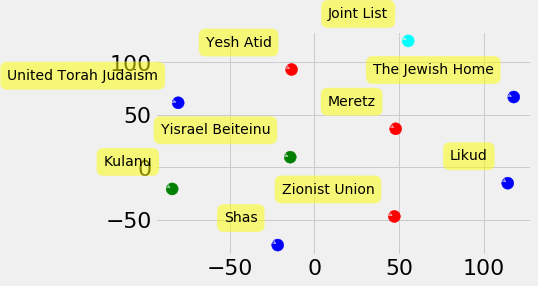

In [418]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
results_tsne = tsne.fit(X)

coords = results_tsne.embedding_

colors = ['blue','red','green','cyan','magenta','yellow','black','white']
label_colors = [colors[i] for i in clusters]

plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    coords[:, 0], coords[:, 1], marker = 'o', c=label_colors
    )

#names = distance.index.values.tolist()
for label, x, y in zip(names, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()


# Distance Matrix
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html
- https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance

In [419]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

x = res_work_df_percentage_votes_transpose

res = pairwise_distances(x, metric='correlation') # cosine / jaccard / correlation / euclidean

distance = pd.DataFrame(res, index=res_work_df_percentage_votes_transpose.index, 
                        columns= res_work_df_percentage_votes_transpose.index)

distance

,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
Joint List,0.000000,1.367228,1.349719,1.135943,1.093125,1.190827,1.060608,1.422978,1.086445,1.353393
Kulanu,1.367228,0.000000,0.387466,1.250750,0.821314,1.212273,1.114415,0.670297,0.821421,1.037505
Likud,1.349719,0.387466,0.000000,1.496075,0.600312,0.810013,1.035258,1.096753,0.774399,1.499037
Meretz,1.135943,1.250750,1.496075,0.000000,1.313049,1.351136,1.137316,0.802393,1.169799,0.416618
Shas,1.093125,0.821314,0.600312,1.313049,0.000000,1.032138,0.600705,1.317005,0.860421,1.414061
The Jewish Home,1.190827,1.212273,0.810013,1.351136,1.032138,0.000000,1.032231,1.368666,1.059215,1.496226
United Torah Judaism,1.060608,1.114415,1.035258,1.137316,0.600705,1.032231,0.000000,1.189887,1.009505,1.202599
Yesh Atid,1.422978,0.670297,1.096753,0.802393,1.317005,1.368666,1.189887,0.000000,1.018558,0.373886
Yisrael Beiteinu,1.086445,0.821421,0.774399,1.169799,0.860421,1.059215,1.009505,1.018558,0.000000,1.152551
Zionist Union,1.353393,1.037505,1.499037,0.416618,1.414061,1.496226,1.202599,0.373886,1.152551,0.000000


## Hierarchical Clustering

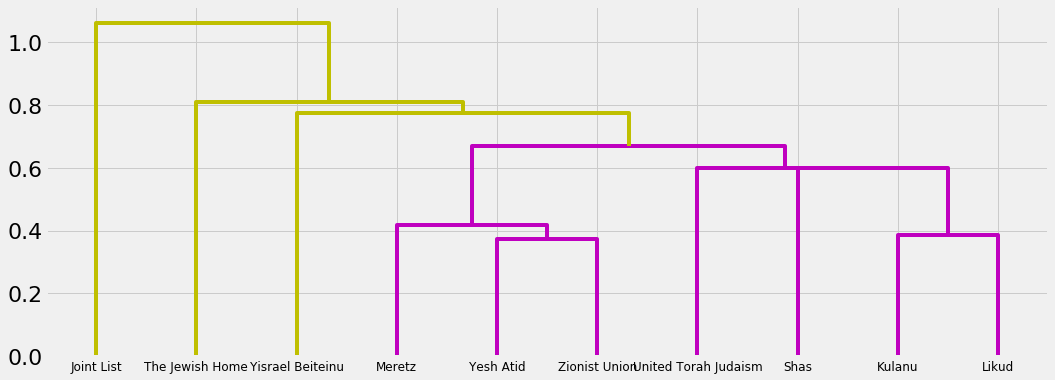

In [420]:
import scipy
from scipy.cluster import hierarchy

labels = distance.index.values.tolist()
sq_distance = scipy.spatial.distance.squareform(distance)

Z = hierarchy.linkage(sq_distance, 'single')
#plt.figure()
#dn = hierarchy.dendrogram(Z)

hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
fig, axes = plt.subplots(1, 1, figsize=(16, 6))
#dn1 = hierarchy.dendrogram(Z, ax=axes[0], above_threshold_color='y', orientation='top', labels=labels)
dn1 = hierarchy.dendrogram(Z, ax=axes, above_threshold_color='y', orientation='top', labels=labels)
#dn2 = hierarchy.dendrogram(Z, ax=axes[1], above_threshold_color='#bcbddc', orientation='right', labels=labels)
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

## Heatmap of Distance Matrix Reordered as the Dendrogram

In [421]:
new_order_distance = distance.reindex(dn1['ivl'])
new_order_distance = new_order_distance[dn1['ivl']] 

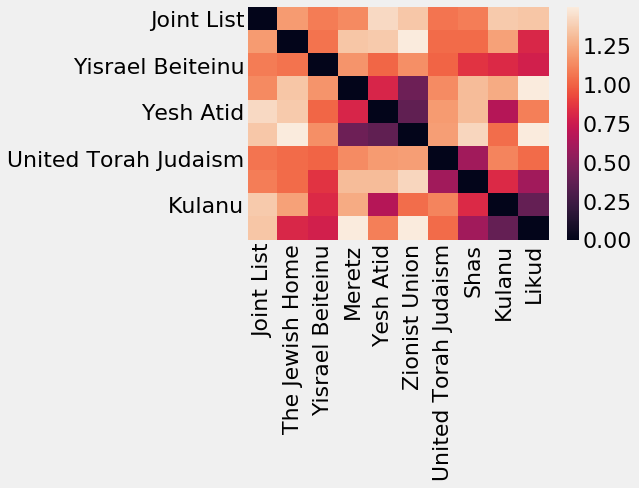

In [422]:
import seaborn as sns
ax = sns.heatmap(new_order_distance)

# Build Network

In [423]:
distance_cutoff = 1
parties = percantage_vote_per_pary.index.tolist()
parties

['Joint List',
 'Kulanu',
 'Likud',
 'Meretz',
 'Shas',
 'The Jewish Home',
 'United Torah Judaism',
 'Yesh Atid',
 'Yisrael Beiteinu',
 'Zionist Union']

In [424]:
import itertools
dist_list = list(distance.index)
all_2_org_combos = itertools.combinations(dist_list, 2)
max_dist = distance.max().max()

# Generate graph with nodes: 
G=nx.Graph()

for p in parties:
    G.add_node(p,
               name=p,
               p_vote=float(percantage_vote_per_pary[p]),             
               comm="0") 
    
# Connect nodes:
for combo in all_2_org_combos:
    combo_dist = distance[combo[0]][combo[1]]
    opp_dist = combo_dist - max_dist
    if distance[combo[0]][combo[1]] < distance_cutoff:
        G.add_edge(combo[0],combo[1],weight=float(abs(opp_dist)))
        

n = G.number_of_nodes()
m = G.number_of_edges()     
print("number of nodes in graph G: ",n)
print("number of edges in graph G: ",m)
print()

number of nodes in graph G:  10
number of edges in graph G:  12



## Communities and Modularity
- https://en.wikipedia.org/wiki/Modularity_%28networks%29
- https://en.wikipedia.org/wiki/Community_structure
- https://en.wikipedia.org/wiki/Louvain_Modularity

In [425]:
import community
communities = community.best_partition(G)
mod = community.modularity(communities,G)
print("modularity:", mod)

modularity: 0.3598905181179209


In [426]:
if m > 0:         
    for k,v in communities.items():
        #for n in C:
        G.node[k]['comm'] = str(v)
else:
    print("Not runnig Community algorithm because the graph has no edges")

## Draw Networka
- https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
- https://networkx.github.io/documentation/networkx-1.10/reference/drawing.html

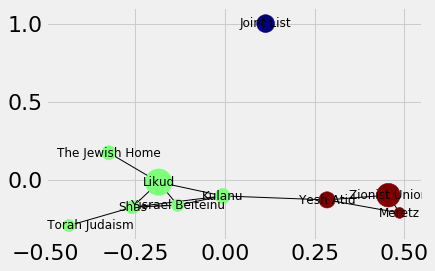

In [427]:
com_values = [communities.get(node) for node in G.nodes()]

p_votes = [d['p_vote'] for n,d in G.nodes(data=True)]
node_size=[v * 3000 for v in p_votes]

#pos=nx.spring_layout(G)
#pos=nx.spectral_layout(G)
#pos=nx.random_layout(G)
#pos=nx.circular_layout(G)
#pos = nx.shell_layout(G)
pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G,pos, cmap = plt.get_cmap('jet'), node_color = com_values, node_size=node_size, with_labels=True)

## Generate gexf file to view in Gephi
- Save network to a gexf file format
- Upload file in Gephi
- Order layout using: OpenOrd / Yifan Hu / Fruchterman Reingold
- Appearance of nodes:
  - Color nodes by community
  - Node size by number of votes (proper votes)
  - Label size by number of votes as well

In [428]:
graphFileName = "parties.gexf"
nx.write_gexf(G, graphFileName, encoding='utf-8')

# Now Generate a Similar Network For Cities 

## Distance Matrix
- The distance will be between each city - try the correlation metric first
- The vector of each city will be composed of the relative votes for each party

In [429]:
res_work_df_percentage_votes.head()

,Joint List,Kulanu,Likud,Meretz,Shas,The Jewish Home,United Torah Judaism,Yesh Atid,Yisrael Beiteinu,Zionist Union
9,0.661678,0.027497,0.044379,0.011486,0.037069,0.001740,0.000522,0.007135,0.139053,0.052036
12,0.002625,0.055118,0.506562,0.023622,0.068241,0.204724,0.002625,0.039370,0.026247,0.031496
14,0.000000,0.086876,0.165434,0.035120,0.002773,0.047135,0.000924,0.231054,0.012939,0.400185
16,0.003279,0.029508,0.042623,0.075410,0.006557,0.026230,0.000000,0.111475,0.006557,0.681967
18,0.001385,0.023546,0.024931,0.098338,0.001385,0.029086,0.002770,0.078947,0.011080,0.703601


## Build Distance matrix and view it

In [430]:


#We would like to measure distance by correlation
matrix_calc = pairwise_distances(res_work_df_percentage_votes, metric='correlation') 

distance = pd.DataFrame(matrix_calc, index=res_work_df_percentage_votes.index, 
                        columns= res_work_df_percentage_votes.index)
distance.head()


,9,12,14,16,18,19,22,23,24,25,27,28,31,32,33,34,35,38,39,42,47,48,51,52,54,57,62,64,65,66,68,71,72,75,78,80,81,82,83,84,...,1134,1135,1136,1138,1139,1140,1143,1145,1146,1147,1149,1150,1152,1153,1154,1156,1157,1159,1160,1161,1163,1166,1168,1169,1170,1171,1172,1174,1175,1176,1178,1179,1181,1184,1185,1186,1189,1190,1192,1194
9,0.000000,1.211834,1.259032,1.141121,1.135686,1.208501,1.245781,1.182134,1.210106,1.315924,1.283669,0.395900,1.215330,1.321493,1.171996,1.207447,1.201664,1.157305,1.150323,1.214826,1.181948,1.239389,1.294134,1.283220,1.204315,0.020603,1.264879,1.172081,0.020920,1.257495,1.216064,1.307831,1.175197,1.201147,1.308636,1.192821,1.280877,1.278392,1.313305,1.203972,...,1.294137,1.267017,1.213996,1.188056,1.299491,1.303489,1.251613,1.154581,1.128403,1.009969,0.060215,1.209150,1.186981,1.142871,1.145218,1.294452,1.195978,1.146896,1.288104,1.176873,1.258844,1.189956,1.262425,1.159276,1.198675,0.023498,1.238373,1.298281,1.218866,1.347289,1.245725,1.227144,1.197439,1.112392,1.133996,1.268855,1.317564,1.218959,1.284522,1.205857
12,1.211834,0.000000,0.853693,1.129124,1.151804,0.096345,0.347389,0.011514,0.169266,0.462023,0.393594,0.402169,0.383071,0.316644,1.149153,0.429019,1.109732,1.139297,0.042359,0.031323,1.182208,1.113206,0.352111,1.003086,0.064224,1.213110,0.374978,0.068833,1.213113,0.707926,0.986428,0.191507,1.031697,0.126107,0.370218,1.149239,0.223249,0.734558,0.194382,1.040991,...,0.178681,0.605609,0.095539,1.141577,0.388376,0.087607,0.764777,1.112608,1.120229,0.095498,1.251646,0.074973,0.686820,1.154357,1.157388,0.248189,1.126817,1.152956,0.551646,1.163305,0.352095,0.102651,0.159095,0.062329,0.039819,1.216483,0.057887,0.269073,0.111949,0.758945,0.960233,1.032226,1.065060,1.163105,1.124035,0.235380,0.447425,1.028081,0.862983,1.065374
14,1.259032,0.853693,0.000000,0.124433,0.156268,0.662332,1.152147,0.860110,0.897701,0.128994,0.142855,0.979460,1.040782,0.215125,0.165539,1.054045,0.088433,0.104425,0.863384,0.710557,0.331475,0.142445,0.239913,0.065426,0.780003,1.254001,0.170221,0.823915,1.259900,0.029969,0.030229,0.783432,0.079121,0.707225,0.183044,0.154971,0.642121,0.058630,0.306449,0.054946,...,0.383079,0.916136,0.689189,0.194971,0.152848,0.869561,0.033674,0.119184,0.152592,0.665636,1.149441,0.913156,1.148754,0.156924,0.228831,0.373280,0.087414,0.172432,0.136350,0.128003,0.990945,0.932639,0.987872,0.746614,0.771173,1.252477,1.000131,0.310208,0.708933,0.039342,0.030915,0.262561,0.081059,0.181631,0.133353,0.874406,0.126133,0.031633,0.002030,0.048917
16,1.141121,1.129124,0.124433,0.000000,0.002440,0.945551,1.258900,1.139386,1.137671,0.381049,0.386365,1.115267,1.147901,0.554690,0.020201,1.140368,0.019178,0.002410,1.144679,1.055583,0.132948,0.041318,0.407536,0.124522,1.071973,1.149108,0.339882,1.109933,1.158892,0.121136,0.042385,1.043128,0.007094,0.979635,0.429055,0.025616,0.827171,0.152613,0.575213,0.015687,...,0.675005,0.967352,0.984163,0.046368,0.382620,1.077649,0.084103,0.001953,0.003426,0.935559,0.986383,1.134101,1.152228,0.004668,0.042593,0.676821,0.011172,0.008880,0.230566,0.016036,1.141077,1.150189,1.179462,1.022413,1.065944,1.140908,1.216757,0.550051,0.994092,0.109575,0.047014,0.149594,0.015850,0.015784,0.001357,1.062293,0.314600,0.035766,0.133507,0.024089
18,1.135686,1.151804,0.156268,0.002440,0.000000,0.974872,1.273689,1.163709,1.164228,0.419902,0.422597,1.134535,1.149473,0.601330,0.014725,1.139547,0.025813,0.007626,1.169530,1.088998,0.111246,0.039033,0.427054,0.142620,1.097773,1.144978,0.365292,1.133433,1.155264,0.145002,0.060253,1.072518,0.015068,1.007147,0.465825,0.021697,0.852801,0.172518,0.607164,0.028302,...,0.712582,0.986469,1.011814,0.037202,0.417356,1.099422,0.103943,0.003907,0.001622,0.964624,0.983302,1.157553,1.143873,0.001260,0.029781,0.714302,0.018255,0.003145,0.251367,0.016627,1.148852,1.172568,1.200404,1.049112,1.093304,1.135070,1.235786,0.580018,1.024443,0.131561,0.063536,0.137141,0.022486,0.009165,0.002667,1.074580,0.341114,0.053832,0.165426,0.039341


## Build Network

### Build the network of cities with the following attributes
- distance_cutoff = 0.01
- min_proper_votes = 1000 : use only cities where proper_votes > min_proper_votes
- Data for each node: city code, city name, proper votes, community
- Edge weight: similarity 

In [431]:
distance_cutoff = 0.01
min_proper_votes = 1000

### Create dictionaries if neccassary

In [432]:
cities_list = list(res_work_df.index)
dict_idx_names = {}
dict_names_properVotes = {}
length = len(res_work_df.index)

for i in range(length):
    dict_idx_names[cities_list[i]] = res_work_df.loc[cities_list[i]]["settlement_name_english"]
for i in range(length):
    dict_names_properVotes[dict_idx_names[cities_list[i]]] = res_work_df.loc[cities_list[i]]["proper_votes"]
    
print("dict_idx_names[9] :",dict_idx_names[9])
print("dict_names_properVotes[ABU SINAN] :",dict_names_properVotes['ABU SINAN'])

dict_idx_names[9] : ABU SINAN
dict_names_properVotes[ABU SINAN] : 5746


### Create list of cities that hold all the constraints
- How many cities hold the constrains?

In [433]:
cities_idx_1000 = []
for i in range(length):
    if dict_names_properVotes[dict_idx_names[cities_list[i]]] > min_proper_votes:
        cities_idx_1000.append(cities_list[i])

print(len(cities_idx_1000))  

200


### Network Generation
- How many nodes?
- How many edges?

In [434]:
all_2_org_combos = itertools.combinations(cities_idx_1000, 2)
max_dist = distance.max().max()

# Generate graph with nodes: 
G=nx.Graph()

for c in cities_idx_1000:
    G.add_node(c,
               name=dict_idx_names[c],
               p_vote=float(dict_names_properVotes[dict_idx_names[c]]),             
               comm="0") 
# Connect nodes:
for combo in all_2_org_combos:
    combo_dist = distance.loc[combo[0]][combo[1]]
    opp_dist = combo_dist - max_dist
    if distance[combo[0]][combo[1]] < distance_cutoff:
        G.add_edge(combo[0],combo[1],weight=float(abs(opp_dist)))
        

n = G.number_of_nodes()
m = G.number_of_edges()     
print("number of nodes in graph G: ",n)
print("number of edges in graph G: ",m)


number of nodes in graph G:  200
number of edges in graph G:  1069


### Run community algorithm
- How many communities?
- How many nodes in the largest community?
- What is the modularity score?

In [435]:
communities = community.best_partition(G)
mod = community.modularity(communities,G)


track={}

for key,value in communities.items():
    if value not in track:
        track[value]=0
    else:
        track[value]+=1

print("number of communities:", len(track))
print("largest community:", max(track,key=track.get))
print("modularity:", mod)

number of communities: 74
largest community: 7
modularity: 0.3517414027697776


### Add communitites information to the nodes in the network

In [436]:
if m > 0:         
    for k,v in communities.items():
        #for n in C:
        G.node[k]['comm'] = str(v)
else:
    print("Not runnig Community algorithm because the graph has no edges")

## Draw Network
- Set node size according to votes / degree
- Try different layouts

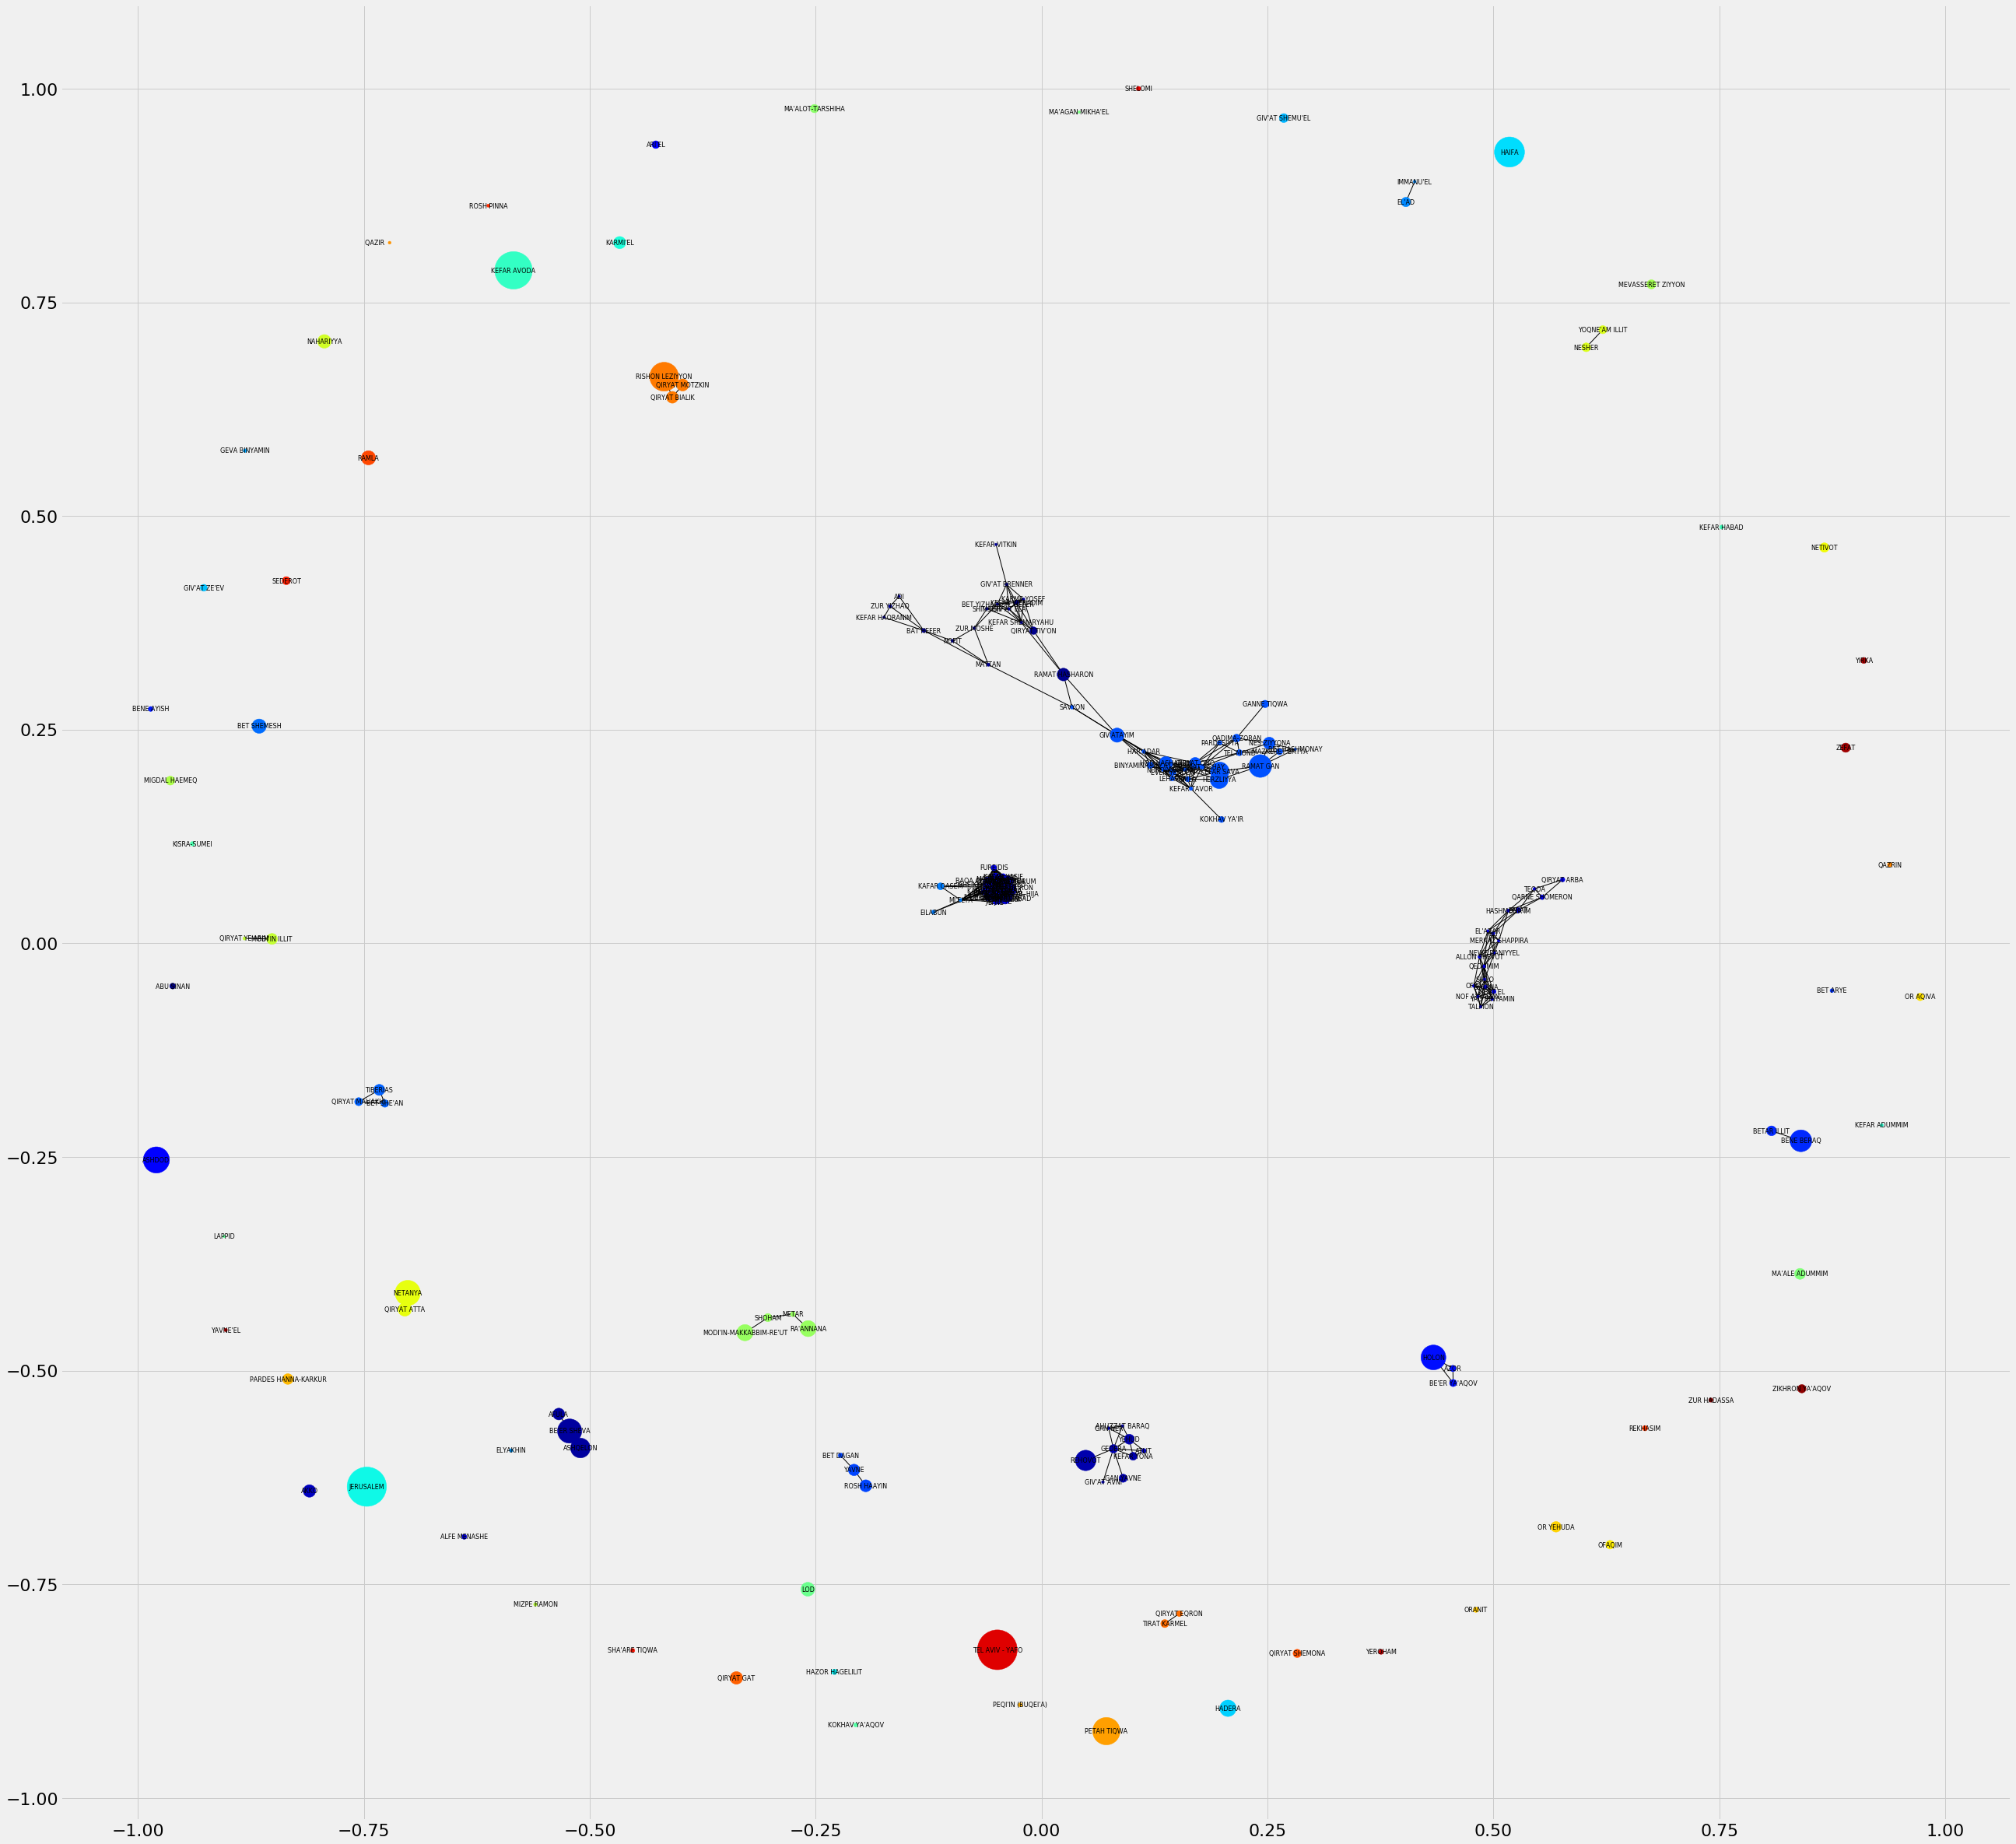

In [437]:
# node_size=[v * 0.01 for v in p_votes]


com_values = [communities.get(node) for node in G.nodes()]
p_votes = [d['p_vote'] for n,d in G.nodes(data=True)]
node_size=[v*0.01 for v in p_votes]
G = nx.relabel_nodes(G,dict_idx_names)
plt.figure(90,figsize=(40,40))
#pos=nx.spring_layout(G)
#pos=nx.spectral_layout(G)
#pos=nx.random_layout(G)
#pos=nx.circular_layout(G)
#pos = nx.shell_layout(G)
pos=nx.fruchterman_reingold_layout(G)
nx.draw_networkx(G,pos, cmap = plt.get_cmap('jet'), node_color = com_values, node_size=node_size, with_labels=True,font_size=8)

## Calculate:

### Sum over network
- Using the network, sum proper votes for each community 
- Print the top 5 communities (in sum of votes) and the cities that compose them
- For one of the cities in a top-5 community, print the votes for each party 

In [475]:
dict_com_pr_votes = {}
dict_com_cities = {}
comm_list =[d for n,d in list(G.nodes(data='comm'))]
p_vote_list = [d for n,d in list(G.nodes(data='p_vote'))]
cities = [d for n,d in list(G.nodes(data='name'))]
if m > 0:         
    for i in  range(len(comm_list)):
        comm =comm_list[i]
        vote = p_vote_list[i]
        city = cities[i]
        if comm in dict_com_pr_votes.keys():
            dict_com_pr_votes[comm] += vote
        else:
            dict_com_pr_votes[comm] = vote
        if comm in dict_com_cities.keys():
            dict_com_cities[comm].append(city)
        else:
            dict_com_cities[comm]=[city]
else:
    print("Not runnig algorithm because the graph has no edges")
    
import operator
#max_values = max(dict_com_pr_votes,5)   
sorted_dict = sorted(dict_com_pr_votes.items(), key=operator.itemgetter(1), reverse=True)[:5]
for i in range(5):
    comm = sorted_dict[i][0]
    print("Community Name:",comm," Cities",dict_com_cities[comm],"\n")

res_work_df[res_work_df.settlement_name_english.str.contains("JERU")][['settlement_name_english','Joint List', 'Kulanu', 'Likud', 'Meretz', 'Shas', 'The Jewish Home', 'United Torah Judaism', 'Yesh Atid', 'Yisrael Beiteinu', 'Zionist Union']]



Community Name: 15  Cities ['BET HASHMONAY', "BINYAMINA-GIV'AT ADA", 'EVEN YEHUDA', 'GANNE TIQWA', "GIV'ATAYIM", 'HAR ADAR', 'HERZLIYYA', 'HOD HASHARON', 'KEFAR SAVA', 'KEFAR TAVOR', "KOKHAV YA'IR", 'LEHAVIM', 'MAZKERET BATYA', 'NES ZIYYONA', 'NORDIYYA', 'OMER', 'PARDESIYYA', 'QADIMA-ZORAN', 'QESARYYA', 'QIRYAT ONO', 'RAMAT GAN', 'RAMAT YISHAY', 'SAVYON', 'TEL MOND'] 

Community Name: 7  Cities ["AR'ARA", 'ARRABE', 'BAQA AL-GHARBIYYE', 'BASMA', "BI'NE", "BU'EINE-NUJEIDAT", 'DABURIYYA', 'DEIR AL-ASAD', 'DEIR HANNA', 'EIN MAHEL', 'FUREIDIS', "I'BILLIN", 'IKSAL', 'JALJULYE', 'JUDEIDE-MAKER', 'KABUL', 'KAFAR BARA', 'KAFAR KANNA', 'KAFAR MANDA', 'KAFAR QARA', 'KAFAR YASIF', 'KAOKAB ABU AL-HIJA', "MA'ALE IRON", 'MAJD AL-KURUM', "MAZRA'A", 'MESHHED', 'MUQEIBLE', 'NAHEF', 'NAZARETH', 'QALANSAWE', 'REINE', 'SAKHNIN', "SHA'AB", 'SHEIKH DANNUN', 'SULAM', 'TAMRA', 'TAYIBE', 'TIRE', "TUR'AN", 'UMM AL-FAHM', 'YAFI', 'ZEMER'] 

Community Name: 67  Cities ['TEL AVIV - YAFO'] 

Community Name: 27  Citi

## Generate gexf file to view in Gephi
- Save network to a gexf file format
- Upload file in Gephi
- Order layout using: OpenOrd / Yifan Hu / Fruchterman Reingold
- Appearance of nodes:
  - Color nodes by community
  - Node size by number of votes (proper votes)
  - Label size by number of votes as well
  - Take a screen-shot of the entire network
  - Take a screen-shot of the largest community (sum over proper votes)

## Questions on Network: 
- Why large Cities are a singelton community?
- Which cities are in the community of Beer Sheva?

# Intersting  links:
- https://github.com/jtorrents/pydata_bcn_NetworkX/blob/master/NetworkX_SNA_workshop_with_solutions.ipynb